In [22]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("insurance.csv")  # Make sure the file is in the same folder
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [24]:
df.shape

(1338, 7)

In [25]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [26]:
df.duplicated().sum()

np.int64(1)

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df.duplicated().sum()

np.int64(0)

In [29]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [30]:
df.charges

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

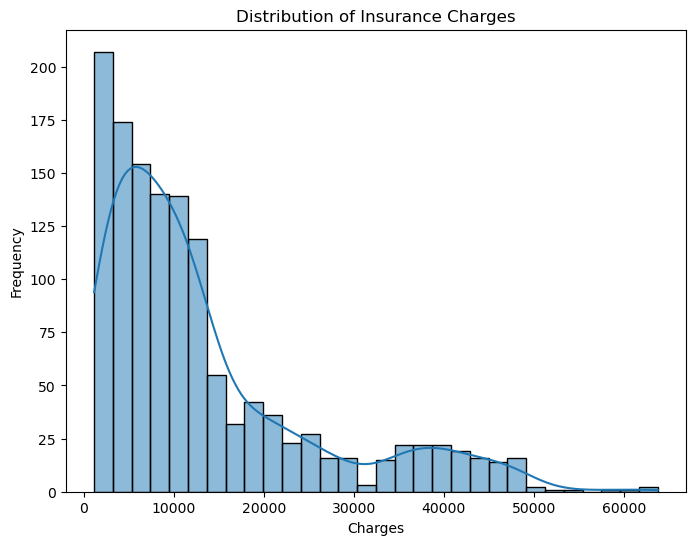

In [31]:
plt.figure(figsize=(8,6))
sns.histplot(df.charges, bins=30, kde=True)
plt.title("Distribution of Insurance Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

In [32]:
print("mean charges:", df.charges.mean())
print("median charges:", df.charges.median())
print("skewness of charges:", df.charges.skew())

mean charges: 13279.121486655948
median charges: 9386.1613
skewness of charges: 1.5153909108403483


In [33]:
np.log1p(df.charges).skew()

np.float64(-0.08955835073325419)

<Axes: xlabel='charges', ylabel='Count'>

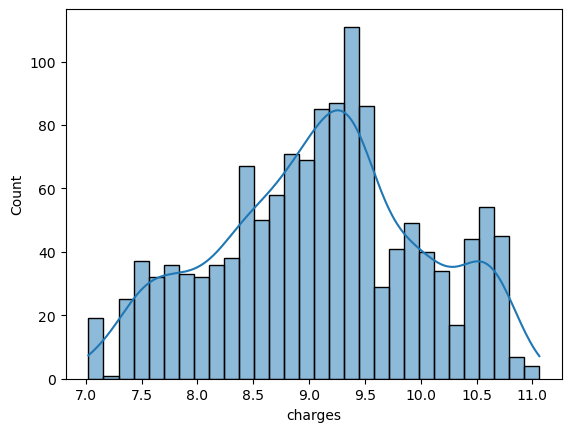

In [34]:
sns.histplot(np.log1p(df.charges), bins=30, kde=True)

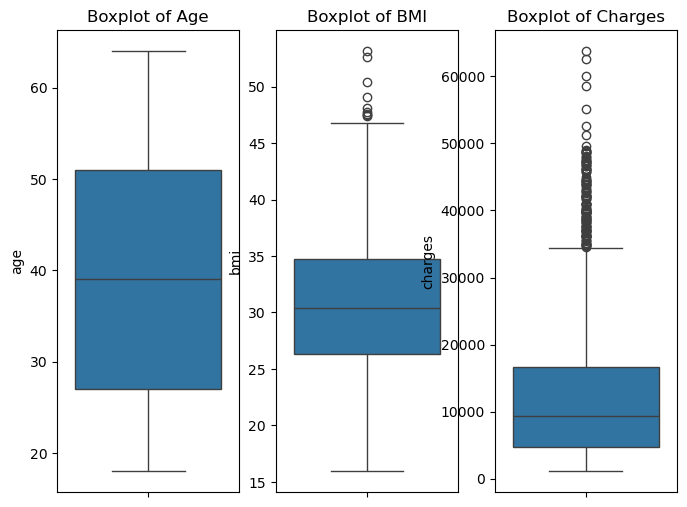

In [35]:
#boxplot to spot outliers
plt.figure(figsize=(8,6))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['age'])
plt.title("Boxplot of Age")

plt.subplot(1, 3, 2)
sns.boxplot(y=df['bmi'])
plt.title("Boxplot of BMI")

plt.subplot(1, 3, 3)
sns.boxplot(y=df['charges'])
plt.title("Boxplot of Charges")

plt.show()

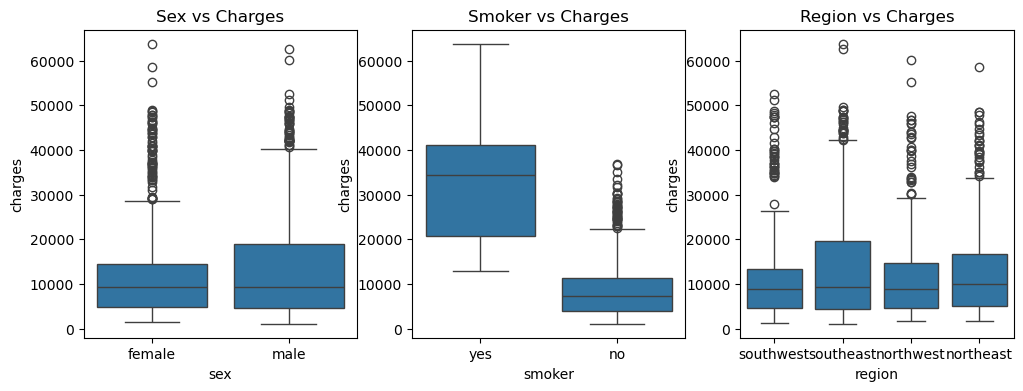

In [36]:
# Relationship categorical vs target
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); sns.boxplot(x='sex', y='charges', data=df); plt.title('Sex vs Charges')
plt.subplot(1,3,2); sns.boxplot(x='smoker', y='charges', data=df); plt.title('Smoker vs Charges')
plt.subplot(1,3,3); sns.boxplot(x='region', y='charges', data=df); plt.title('Region vs Charges')
plt.show()

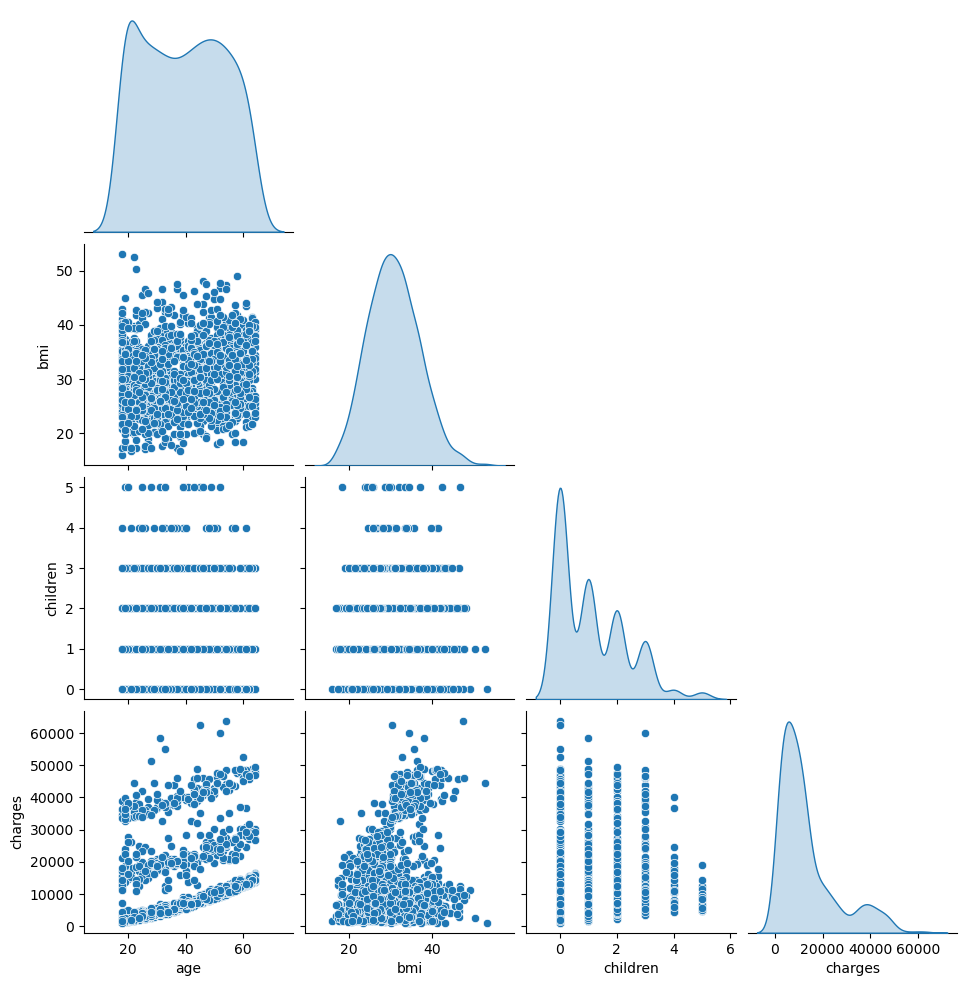

In [37]:
# Numeric pairwise
sns.pairplot(df[['age','bmi','children','charges']], diag_kind='kde', corner=True)
plt.show()

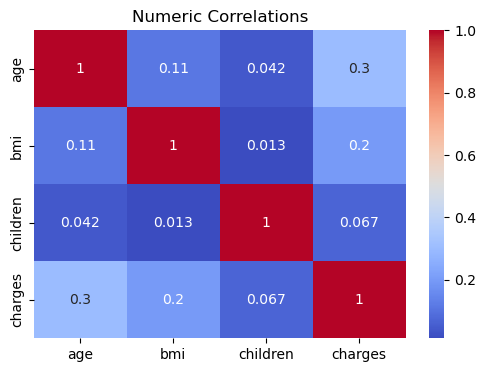

In [38]:
# Correlation heatmap (numeric)
plt.figure(figsize=(6,4))
sns.heatmap(df[['age','bmi','children','charges']].corr(), annot=True, cmap='coolwarm')
plt.title('Numeric Correlations')
plt.show()

In [39]:
#feature engineering
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [40]:
#lets make a interaction feature of age and bmi >> can help to capture the combined/joint effect of age and bmi on charges
df['age_bmi_interaction'] = df['age'] * df['bmi']
df

,age,sex,bmi,children,smoker,region,charges,age_bmi_interaction
0,19,female,27.900,0,yes,southwest,16884.92400,530.100
1,18,male,33.770,1,no,southeast,1725.55230,607.860
2,28,male,33.000,3,no,southeast,4449.46200,924.000
3,33,male,22.705,0,no,northwest,21984.47061,749.265
4,32,male,28.880,0,no,northwest,3866.85520,924.160
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1548.500
1334,18,female,31.920,0,no,northeast,2205.98080,574.560
1335,18,female,36.850,0,no,southeast,1629.83350,663.300
1336,21,female,25.800,0,no,southwest,2007.94500,541.800


In [41]:
X = df.drop('charges', axis=1)
y = df['charges']

In [42]:
X

,age,sex,bmi,children,smoker,region,age_bmi_interaction
0,19,female,27.900,0,yes,southwest,530.100
1,18,male,33.770,1,no,southeast,607.860
2,28,male,33.000,3,no,southeast,924.000
3,33,male,22.705,0,no,northwest,749.265
4,32,male,28.880,0,no,northwest,924.160
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,1548.500
1334,18,female,31.920,0,no,northeast,574.560
1335,18,female,36.850,0,no,southeast,663.300
1336,21,female,25.800,0,no,southwest,541.800


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1069, 7), (268, 7), (1069,), (268,))

In [44]:
#scaling should be done after splitting the data and only on numerical features

numeric_features = ['age', 'bmi', 'children', 'age_bmi_interaction']
categorical_features = ['sex', 'smoker', 'region']


#numeric features>> scaling
#categorical features>> encoding >> one hot encoding

from sklearn.preprocessing import StandardScaler, OneHotEncoder
#either you do the above steps one by one or you can use column transformer to do all the steps in one go using pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')
#drop first is used to avoid dummy variable trap

#column transformer helps in applying different transformations to different columns of the dataframe in one go (like scaling to numeric and encoding to categorical))

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop', #this will drop any other columns not specified in the transformers list
    verbose_feature_names_out=False #this will keep the original column names after transformation instead of adding the prefix like num__ or cat__
)

preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
print(feature_names)


['age' 'bmi' 'children' 'age_bmi_interaction' 'sex_male' 'smoker_yes'
 'region_northwest' 'region_southeast' 'region_southwest']


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#pipeline is combining the preprocessor and model into one step
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                ('model', LinearRegression())])
#cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(pipeline_lr, X_train, y_train, cv=5, scoring='r2')
print("Cross-validation R² scores:", cv_scores)
print("Mean Cross-validation R² score:", np.mean(cv_scores))


Cross-validation R² scores: [0.6741203  0.77459306 0.73878436 0.74287855 0.7745667 ]
Mean Cross-validation R² score: 0.7409885945408258


In [46]:
X_train_trans = preprocessor.transform(X_train)
X_test_trans = preprocessor.transform(X_test)

from sklearn.linear_model import LassoCV
#in lassocv we dont have to manually select the alpha value it will automatically select the best alpha value using cross validation
# LassoCV for selection
lasso_cv = LassoCV(cv=5, random_state=1, max_iter=20000)
lasso_cv.fit(X_train_trans, y_train)
lasso_cv.alpha_  # Optimal alpha value

np.float64(6.993614419986421)

In [47]:
# which features have non-zero coefficients?
nonzero_mask = np.abs(lasso_cv.coef_) > 1e-6
selected_features_transformed = np.array(feature_names)[nonzero_mask]
dropped_features_transformed = np.array(feature_names)[~nonzero_mask]

print("Number of features before:", len(feature_names))
print("Number of selected (non-zero) features by LassoCV:", selected_features_transformed.shape[0])
print("Selected transformed features:\n", selected_features_transformed)
print("Dropped transformed features (Lasso set to 0):\n", dropped_features_transformed)

Number of features before: 9
Number of selected (non-zero) features by LassoCV: 9
Selected transformed features:
 ['age' 'bmi' 'children' 'age_bmi_interaction' 'sex_male' 'smoker_yes'
 'region_northwest' 'region_southeast' 'region_southwest']
Dropped transformed features (Lasso set to 0):
 []


In [48]:
lasso_cv.coef_

array([ 3554.0409476 ,  2298.02744816,   684.85645548,    26.58962198,
        -488.4615157 , 23546.18644375,  -352.09788003, -1234.99097123,
        -761.53929739])

In [49]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# We'll define pipelines (preprocessor + model) and a grid for each regularized model.
ridge_pipe = Pipeline([('preprocessor', preprocessor), ('model', Ridge(random_state=1))])
lasso_pipe = Pipeline([('preprocessor', preprocessor), ('model', Lasso(max_iter=20000, random_state=1))])
elastic_pipe = Pipeline([('preprocessor', preprocessor), ('model', ElasticNet(max_iter=20000, random_state=1))])
linear_pipe = Pipeline([('preprocessor', preprocessor), ('model', LinearRegression())])  # baseline

# Parameter grids
ridge_params = {'model__alpha': [0.01, 0.1, 1.0, 10.0, 50.0, 100.0]}
lasso_params = {'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]}
elastic_params = {
    'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'model__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

In [50]:

from sklearn.model_selection import GridSearchCV


grids = {}

# LinearRegression (no hyperparams) - use CV only to get a baseline
linear_grid = GridSearchCV(linear_pipe, param_grid={}, cv=5, scoring='r2')
linear_grid.fit(X_train, y_train)
grids['LinearRegression'] = linear_grid
print('Linear CV best score:', linear_grid.best_score_)

# Ridge
ridge_grid = GridSearchCV(ridge_pipe, ridge_params, cv=5, scoring='r2', verbose=0)
ridge_grid.fit(X_train, y_train)
grids['Ridge'] = ridge_grid
print('Ridge best params:', ridge_grid.best_params_, 'best CV R2:', ridge_grid.best_score_)

# Lasso
lasso_grid = GridSearchCV(lasso_pipe, lasso_params, cv=5, scoring='r2', verbose=0)
lasso_grid.fit(X_train, y_train)
grids['Lasso'] = lasso_grid
print('Lasso best params:', lasso_grid.best_params_, 'best CV R2:', lasso_grid.best_score_)

# ElasticNet
elastic_grid = GridSearchCV(elastic_pipe, elastic_params, cv=5, scoring='r2', verbose=0)
elastic_grid.fit(X_train, y_train)
grids['ElasticNet'] = elastic_grid
print('ElasticNet best params:', elastic_grid.best_params_, 'best CV R2:', elastic_grid.best_score_)

Linear CV best score: 0.7409885945408258
Ridge best params: {'model__alpha': 1.0} best CV R2: 0.7410289640410916
Lasso best params: {'model__alpha': 10.0} best CV R2: 0.7412064294929386
ElasticNet best params: {'model__alpha': 0.01, 'model__l1_ratio': 0.9} best CV R2: 0.7410285164622471


In [51]:
def eval_on_test(estimator, X_test, y_test):
    y_pred = estimator.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2, y_pred

results = []
predictions = {}
for name, grid in grids.items():
    best_est = grid.best_estimator_
    mae, rmse, r2, y_pred = eval_on_test(best_est, X_test, y_test)
    results.append({'Model': name, 'MAE': mae, 'RMSE': rmse, 'R2': r2})
    predictions[name] = y_pred
results_df = pd.DataFrame(results).sort_values(by='R2', ascending=False).reset_index(drop=True)
results_df

,Model,MAE,RMSE,R2
0,Lasso,3919.652570,5681.469057,0.750471
1,LinearRegression,3924.364624,5689.258788,0.749786
2,Ridge,3932.559405,5692.846243,0.749470
3,ElasticNet,3933.142939,5693.108491,0.749447


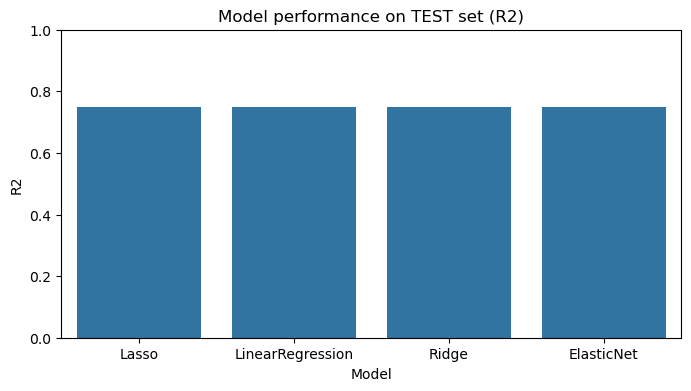

,Model,MAE,RMSE,R2
0,Lasso,3919.65,5681.47,0.750
1,LinearRegression,3924.36,5689.26,0.750
2,Ridge,3932.56,5692.85,0.749
3,ElasticNet,3933.14,5693.11,0.749


In [52]:
plt.figure(figsize=(8,4))
sns.barplot(data=results_df, x='Model', y='R2')
plt.title('Model performance on TEST set (R2)')
plt.ylim(0, 1)
plt.show()

# Show numeric table
results_df.style.format({'MAE':'{:.2f}','RMSE':'{:.2f}','R2':'{:.3f}'})



In [53]:
best_name = results_df.loc[0, 'Model']
best_grid = grids[best_name]
best_pipe = best_grid.best_estimator_

print("Best model:", best_name)
# Extract transformed feature names
transformed_feature_names = best_pipe.named_steps['preprocessor'].get_feature_names_out()
coef = best_pipe.named_steps['model'].coef_

coef_df = pd.DataFrame({'feature': transformed_feature_names, 'coef': coef})
coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False).reset_index(drop=True)
coef_df.head(20)

Best model: Lasso


,feature,coef,abs_coef
0,smoker_yes,23526.766766,23526.766766
1,age,3525.710422,3525.710422
2,bmi,2277.475640,2277.475640
3,region_southeast,-1181.906102,1181.906102
4,region_southwest,-711.219366,711.219366
5,children,680.773206,680.773206
6,sex_male,-473.990591,473.990591
7,region_northwest,-302.042104,302.042104
8,age_bmi_interaction,58.041182,58.041182


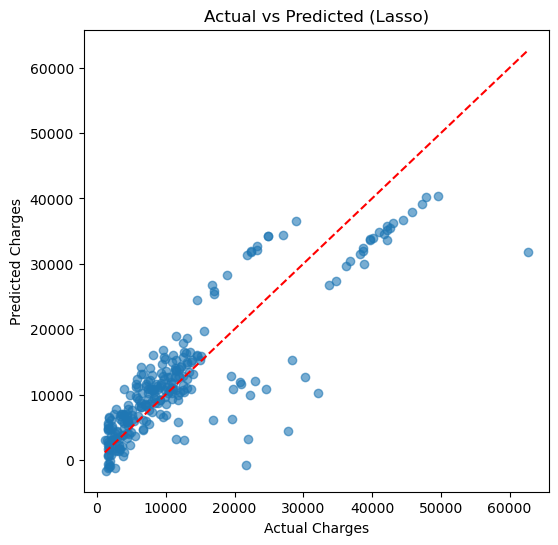

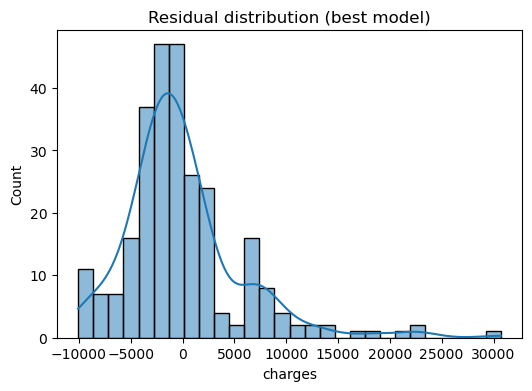

In [54]:
y_pred_best = predictions[best_name]
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Charges'); plt.ylabel('Predicted Charges')
plt.title(f'Actual vs Predicted ({best_name})')
plt.show()

# Residuals
residuals = y_test - y_pred_best
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title('Residual distribution (best model)')
plt.show()

In [55]:
#which feature is most important
#generally we see magnitude of coefficient indicates the importance of the feature
#permutation importance can also be used to find feature importance
#in permutation importance we shuffle the feature values and see the impact on model performance
#we can also check feature importance using shap values/analysis

In [56]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(best_pipe.named_steps['model'], X_test_trans, y_test, n_repeats=20, random_state=1)
perm_means = perm.importances_mean

perm_df = pd.DataFrame({'transformed_feature': transformed_feature_names, 'importance': perm_means})
perm_df = perm_df.sort_values(by='importance', ascending=False).reset_index(drop=True)
perm_df.head(20)

,transformed_feature,importance
0,smoker_yes,1.132018
1,age,0.186352
2,bmi,0.053887
3,region_southwest,0.004664
4,region_southeast,0.002142
5,children,0.001410
6,region_northwest,-0.000385
7,age_bmi_interaction,-0.000580
8,sex_male,-0.002347


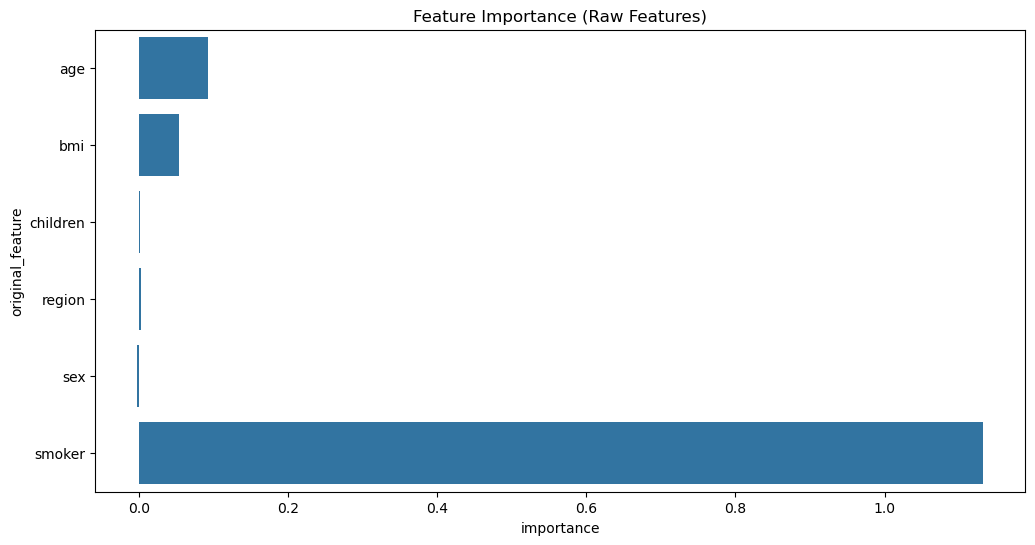

In [57]:
#write a code  to combine all features importance of raw features (due to one hot encoding we have multiple columns for one categorical feature) and plot a bar graph to show feature importance of raw features
# Map transformed features back to original features
import matplotlib.pyplot as plt

# Combine permutation importance with original feature names
combined_importance = perm_df.copy()
combined_importance['original_feature'] = combined_importance['transformed_feature'].str.split('_').str[0]
combined_importance = combined_importance.groupby('original_feature')['importance'].mean().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=combined_importance, x='importance', y='original_feature')
plt.title('Feature Importance (Raw Features)')
plt.show()

In [58]:
top_raw = combined_importance['original_feature'].head(4).tolist()
print("Top raw features by aggregated permutation importance:", top_raw)

Top raw features by aggregated permutation importance: ['age', 'bmi', 'children', 'region']


In [59]:
#finally we can save the model using joblib or pickle
import joblib
joblib.dump(best_pipe, 'best_insurance_model.pkl')

['best_insurance_model.pkl']

In [60]:
sample = pd.DataFrame([{
    'age': 40,
    'sex': 'male',
    'bmi': 28.5,
    'children': 2,
    'smoker': 'no',
    'region': 'southeast',
    'age_bmi_interaction': 28.5 * 40
}])

print("Sample input:")
display(sample)

pred_sample = best_pipe.predict(sample)[0]
print(f"Predicted insurance charge for sample: ${pred_sample:,.2f}")

Sample input:


,age,sex,bmi,children,smoker,region,age_bmi_interaction
0,40,male,28.5,2,no,southeast,1140.0


Predicted insurance charge for sample: $7,500.49
